# LAB 2

In [52]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Загрузка данных

In [53]:
df = pd.read_csv('data/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [54]:
var_names = list(df.columns) #получение имен признаков
labels = df.to_numpy('int')[:,-1] #метки классов
data = df.to_numpy('float')[:,:-1] #описательные признаки

In [55]:
np.unique(labels)


array([1, 2, 3, 5, 6, 7])

In [56]:
data = preprocessing.minmax_scale(data)

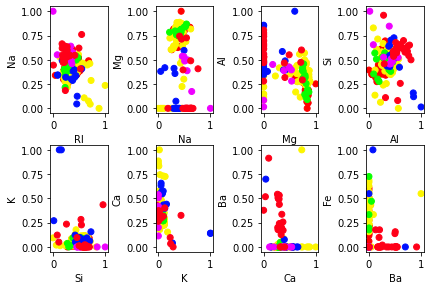

In [57]:
fig, axs = plt.subplots(2,4)
plt.tight_layout()

for i in range(data.shape[1]-1):
    axs[i//4, i%4].scatter(data[:, i], data[:,(i+1)], c=labels, cmap='hsv')

    axs[i//4, i%4].set_xlabel(var_names[i])
    axs[i//4, i%4].set_ylabel(var_names[i+1])

plt.show()

HSV
* красный - 1
* желтый - 2
* зеленый - 3
* голубой - 4 (не используется)
* синий - 5
* фиолетовый - 6
* красный - 7

## Методы главных компонент

In [58]:
pca = PCA(n_components = 2)
pca_data = pca.fit(data).transform(data)

In [59]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.45429569 0.17990097]
[5.1049308  3.21245688]


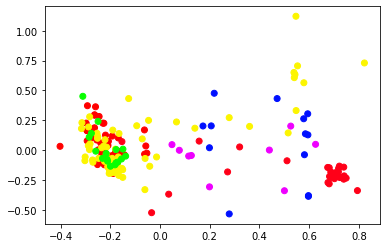

In [60]:
plt.tight_layout()
plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='hsv')
plt.show()

TODO: ОБЪЯСНИТЬ

In [61]:
pca_test = PCA(n_components = 4)
pca_test_data = pca_test.fit(data).transform(data)

In [62]:
print(pca_test.explained_variance_ratio_)
print(pca_test.singular_values_)

[0.45429569 0.17990097 0.12649459 0.09797847]
[5.1049308  3.21245688 2.69374532 2.3707507 ]


In [63]:
print(f"при {pca_test.n_components} объяснено {np.sum(pca_test.explained_variance_ratio_)}")

при 4 объяснено 0.8586697305102717


In [64]:
prev_data = pca.inverse_transform(pca_data)
prev_data

array([[ 0.31977525,  0.35177682,  0.95959031, ...,  0.28753884,
        -0.05709635,  0.15446576],
       [ 0.23541229,  0.40864647,  0.80238844, ...,  0.22601248,
         0.02429236,  0.05797254],
       [ 0.21027814,  0.42056458,  0.79216838, ...,  0.20331592,
         0.03725491,  0.03325719],
       ...,
       [ 0.26940681,  0.51246805, -0.05774794, ...,  0.36092437,
         0.27613283, -0.00485705],
       [ 0.22418866,  0.52801956, -0.03321633, ...,  0.31497387,
         0.28622509, -0.04459475],
       [ 0.23188077,  0.52718286, -0.05056928, ...,  0.32436217,
         0.28857059, -0.03928655]])

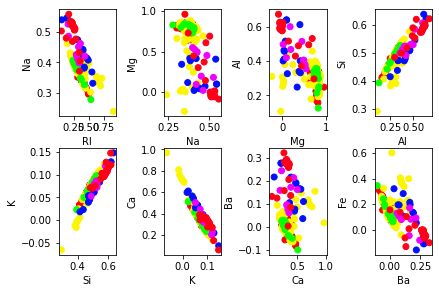

In [65]:
fig, axs = plt.subplots(2,4)
plt.tight_layout()

for i in range(data.shape[1]-1):
    axs[i//4, i%4].scatter(prev_data[:, i], prev_data[:,(i+1)], c=labels, cmap='hsv')

    axs[i//4, i%4].set_xlabel(var_names[i])
    axs[i//4, i%4].set_ylabel(var_names[i+1])

plt.show()

TODO: ОБЪЯСНИТЬ

In [66]:
pca = PCA(n_components = 2, svd_solver="randomized")
pca_data = pca.fit(data).transform(data)

In [67]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.45429569 0.17990097]
[5.1049308  3.21245688]


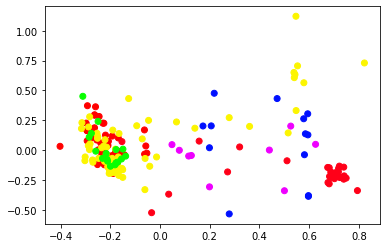

In [68]:
plt.tight_layout()
plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='hsv')
plt.show()

#TODO: ОБЪЯСНИТЬ
